In [59]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
entries = ['^GDAXI','DTE.DE','SAP.DE','FME.DE','BEI.DE','DB1.DE','IFX.DE','WDI.DE','ADS.DE',
           'FIE.DE','FNTN.DE','DRW3.DE','AFX.DE','DLG.DE','SOW.DE','HNR1.DE',
           'AAPL','MSFT','IBM','PVH']
merged_quotes = pd.DataFrame()

for symbol in entries:
    ticks = yf.Ticker(symbol)
    h = ticks.history(start='2018-01-01', end='2018-12-31')
    history = h['Close']
    if merged_quotes.size == 0:
        merged_quotes = history.to_frame()
    else:
        merged_quotes = pd.merge(merged_quotes, history.to_frame(), on='Date')

In [61]:
merged_quotes.columns=entries
merged_quotes

,^GDAXI,DTE.DE,SAP.DE,FME.DE,BEI.DE,DB1.DE,IFX.DE,WDI.DE,ADS.DE,FIE.DE,FNTN.DE,DRW3.DE,AFX.DE,DLG.DE,SOW.DE,HNR1.DE,AAPL,MSFT,IBM,PVH
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02,12871.39,12.83,90.25,83.09,94.75,91.72,22.24,93.05,160.44,69.38,26.82,71.20,50.09,26.51,44.15,99.45,166.80,83.03,139.37,138.44
2018-01-03,12978.21,12.80,91.48,83.68,95.22,92.52,22.96,95.48,161.30,69.66,26.91,71.94,50.77,26.15,44.96,98.79,166.77,83.42,143.20,138.68
2018-01-04,13167.89,12.87,92.47,84.79,96.58,94.07,23.23,96.90,163.41,69.47,27.05,74.17,51.21,26.53,45.09,100.68,167.55,84.15,146.10,140.88
2018-01-05,13319.64,12.94,93.79,86.49,97.78,94.21,23.46,99.23,165.14,70.04,27.55,76.05,51.75,26.22,45.25,100.77,169.46,85.19,146.81,142.55
2018-01-08,13367.78,13.01,93.62,87.01,98.79,95.39,23.78,105.68,165.81,69.80,27.55,77.78,52.24,26.01,45.12,100.68,168.83,85.28,147.70,142.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-19,10766.21,13.95,88.04,57.07,92.36,102.50,17.04,135.77,184.54,53.26,15.31,46.81,69.83,22.94,30.10,114.53,158.13,101.90,109.95,91.22
2018-12-20,10611.10,13.72,86.60,56.32,92.06,102.55,16.45,128.58,181.29,52.68,15.12,46.41,68.30,22.58,29.45,113.56,154.14,99.76,106.73,90.09
2018-12-21,10633.82,13.62,85.27,55.31,92.04,103.63,16.59,128.73,182.27,52.49,15.18,45.94,67.91,21.67,29.43,113.27,148.15,96.54,104.77,88.48


In [62]:
pct_changes = pd.DataFrame()
for e in entries:
    pct_changes[e] = merged_quotes[e].pct_change().copy()

In [63]:
correlation_matrix = pct_changes.corr()
correlation_matrix

,^GDAXI,DTE.DE,SAP.DE,FME.DE,BEI.DE,DB1.DE,IFX.DE,WDI.DE,ADS.DE,FIE.DE,FNTN.DE,DRW3.DE,AFX.DE,DLG.DE,SOW.DE,HNR1.DE,AAPL,MSFT,IBM,PVH
^GDAXI,1.000000,0.613351,0.745182,0.486171,0.465801,0.496410,0.719384,0.579810,0.556142,0.419163,0.492756,0.342825,0.375998,0.298283,0.534715,0.670199,0.231392,0.258076,0.229422,0.283691
DTE.DE,0.613351,1.000000,0.401727,0.222460,0.404836,0.304562,0.350156,0.245438,0.325793,0.246833,0.492506,0.190723,0.164419,0.119150,0.274173,0.456712,-0.032124,0.011860,0.082028,0.021676
SAP.DE,0.745182,0.401727,1.000000,0.413244,0.423792,0.429580,0.610232,0.632986,0.436144,0.328306,0.262073,0.297203,0.377657,0.223428,0.523745,0.428681,0.282770,0.320601,0.212589,0.213570
FME.DE,0.486171,0.222460,0.413244,1.000000,0.191228,0.369388,0.305413,0.269086,0.206978,0.211184,0.213068,0.095037,0.204146,0.103012,0.311668,0.249495,0.267018,0.220716,0.360622,0.199888
BEI.DE,0.465801,0.404836,0.423792,0.191228,1.000000,0.298629,0.291088,0.314712,0.334297,0.260372,0.291202,0.149968,0.275929,0.042183,0.393143,0.363510,0.057321,0.148288,0.150762,0.119211
DB1.DE,0.496410,0.304562,0.429580,0.369388,0.298629,1.000000,0.315919,0.388089,0.324507,0.172512,0.196697,0.175507,0.344101,0.086551,0.374878,0.396735,0.095042,0.011806,0.002002,0.059785
IFX.DE,0.719384,0.350156,0.610232,0.305413,0.291088,0.315919,1.000000,0.504860,0.384815,0.360643,0.344268,0.324783,0.300435,0.396653,0.428569,0.414411,0.267815,0.218810,0.193078,0.250371
WDI.DE,0.579810,0.245438,0.632986,0.269086,0.314712,0.388089,0.504860,1.000000,0.351152,0.314709,0.246952,0.263770,0.455781,0.274722,0.498730,0.384922,0.342554,0.304855,0.118858,0.202156
ADS.DE,0.556142,0.325793,0.436144,0.206978,0.334297,0.324507,0.384815,0.351152,1.000000,0.302656,0.278471,0.196362,0.255381,0.178829,0.289962,0.335031,0.062106,0.132299,0.049694,0.198112
FIE.DE,0.419163,0.246833,0.328306,0.211184,0.260372,0.172512,0.360643,0.314709,0.302656,1.000000,0.296524,0.145062,0.283655,0.203137,0.312227,0.231701,0.118147,0.120938,0.062879,0.231747


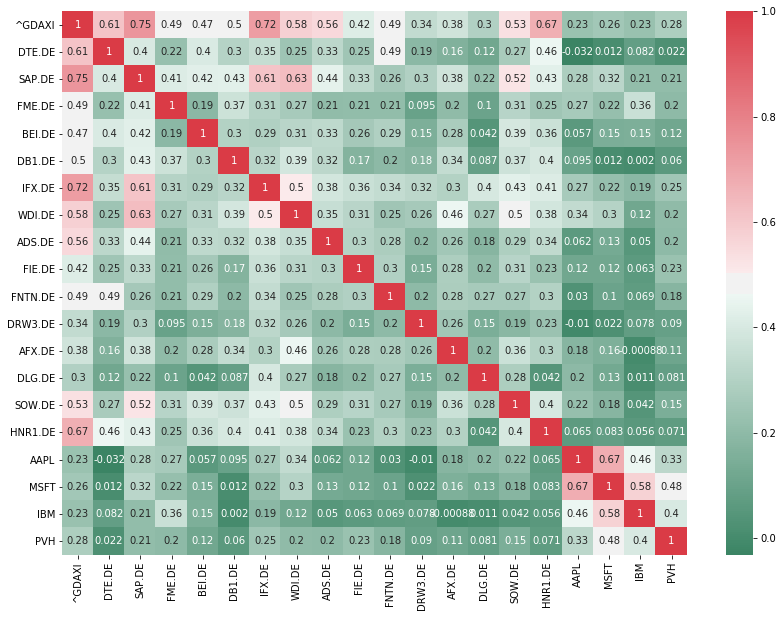

In [64]:
fig, ax = plt.subplots(figsize=(14,10))         # Sample figsize in inches

#corr.style.background_gradient(cmap='coolwarm')
cmap = sns.diverging_palette(150, 10, as_cmap=True)

sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns,
            cbar_kws={},
            cmap = cmap,
            annot=True,
            ax=ax)